# **1. Loading data**

In [ ]:
import pandas as pd
sales_data= pd.read_csv('sales_data.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the sales data from the file
data = pd.read_csv('sales_data.csv', parse_dates=['date '], dayfirst=True)

# Set the 'date ' column as the index
data.set_index('date ', inplace=True)

data.fillna(1, inplace=True)

print(data.head())



            quantity
date                
2021-05-01       6.0
2021-05-02       2.0
2021-05-03       4.0
2021-05-04       6.0
2021-05-05       5.0


# **Objective 1 : To analyse the sales of HF deluxe bikes**

# **2. Exploratory Data Analysis**

In [ ]:
# Display the first few rows of the dataset
print(data.head())

            quantity
date                
2021-05-01       6.0
2021-05-02       2.0
2021-05-03       4.0
2021-05-04       6.0
2021-05-05       5.0


In [ ]:
# Summary statistics
print(data.describe())

         quantity
count  760.000000
mean     3.473684
std      1.766126
min      1.000000
25%      2.000000
50%      3.000000
75%      5.000000
max      6.000000


In [ ]:
# Check for missing values
print(data.isnull().sum())

quantity    0
dtype: int64


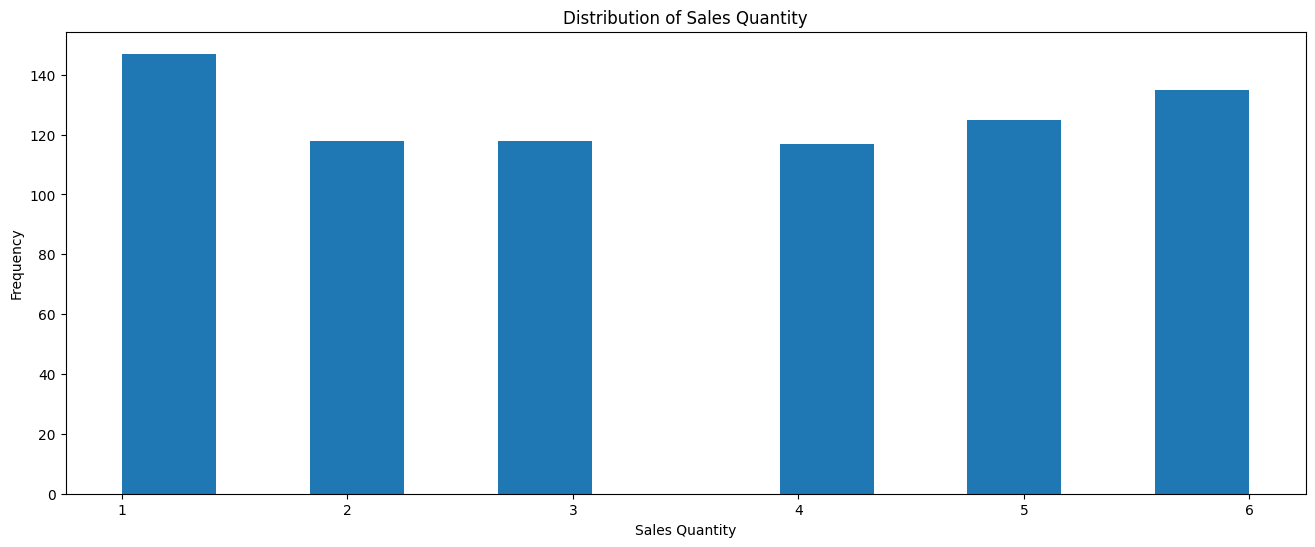

In [ ]:
# Distribution of sales quantity
plt.figure(figsize=(16, 6))
plt.hist(data['quantity'], bins=12)
plt.xlabel('Sales Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Quantity')
plt.show()


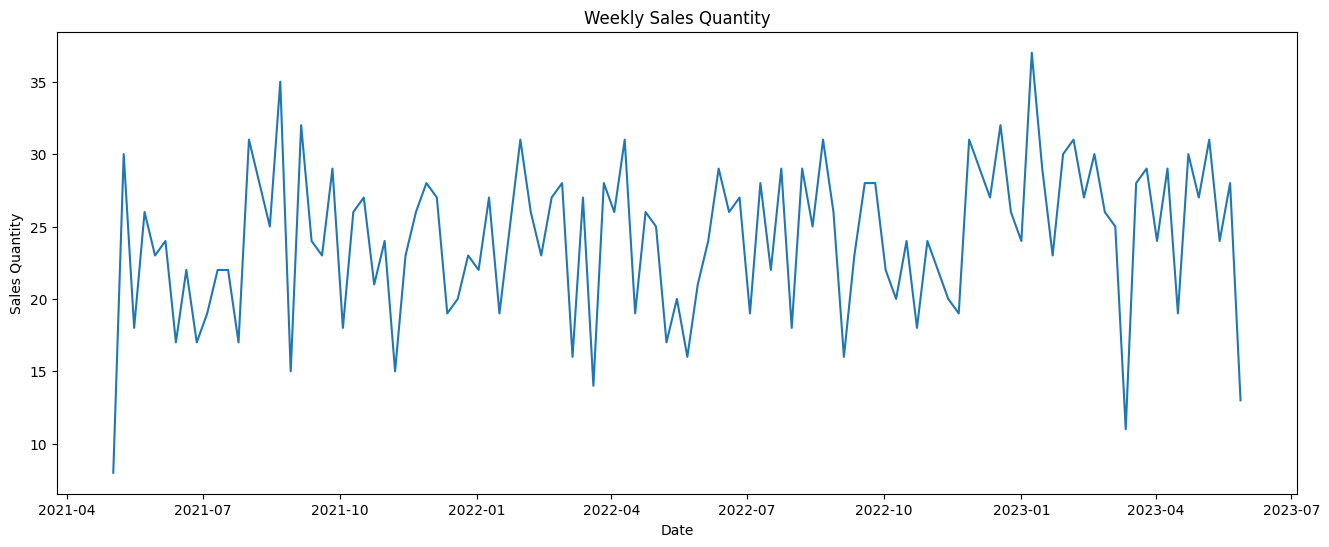

In [ ]:
# Line plot of weekly sales quantity
weekly_sales = data['quantity'].resample('W').sum()

# Time Series Plot with weekly data
plt.figure(figsize=(16, 6))
plt.plot(weekly_sales.index, weekly_sales)
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('Weekly Sales Quantity')
plt.show()



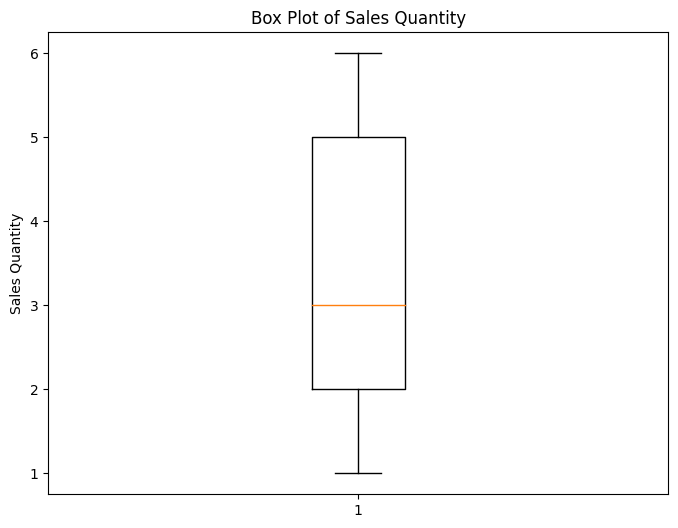

In [ ]:
# Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot(data['quantity'])
plt.ylabel('Sales Quantity')
plt.title('Box Plot of Sales Quantity')
plt.show()

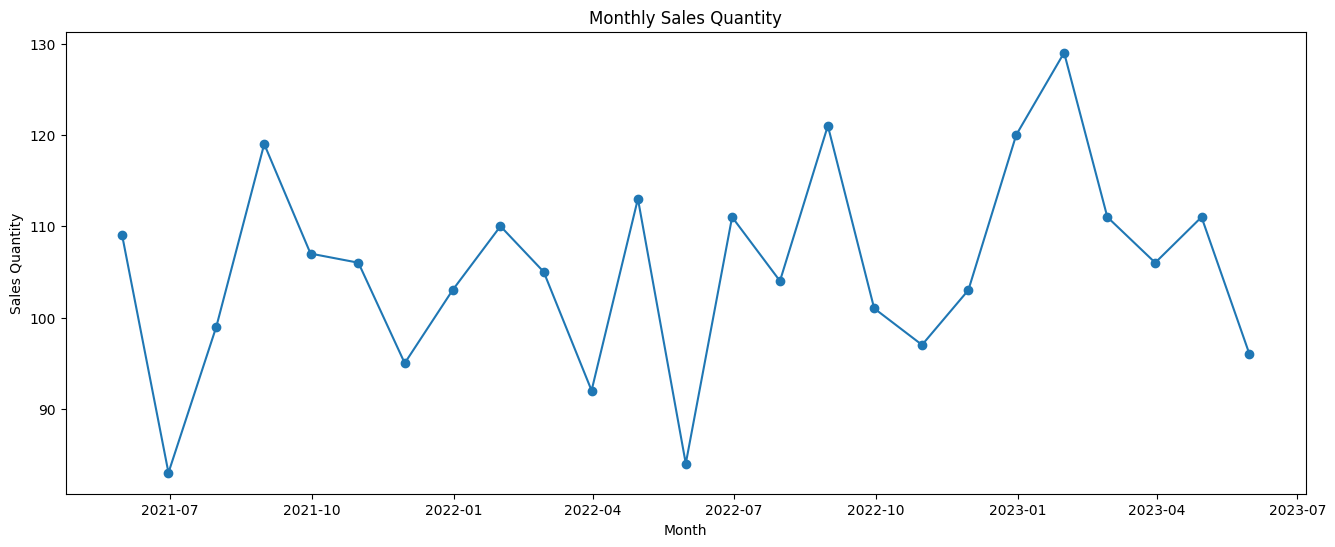

In [ ]:
# Line plot of Monthly Sales
monthly_sales = data.resample('M').sum()
plt.figure(figsize=(16, 6))
plt.plot(monthly_sales.index, monthly_sales['quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Sales Quantity')
plt.title('Monthly Sales Quantity')
plt.show()


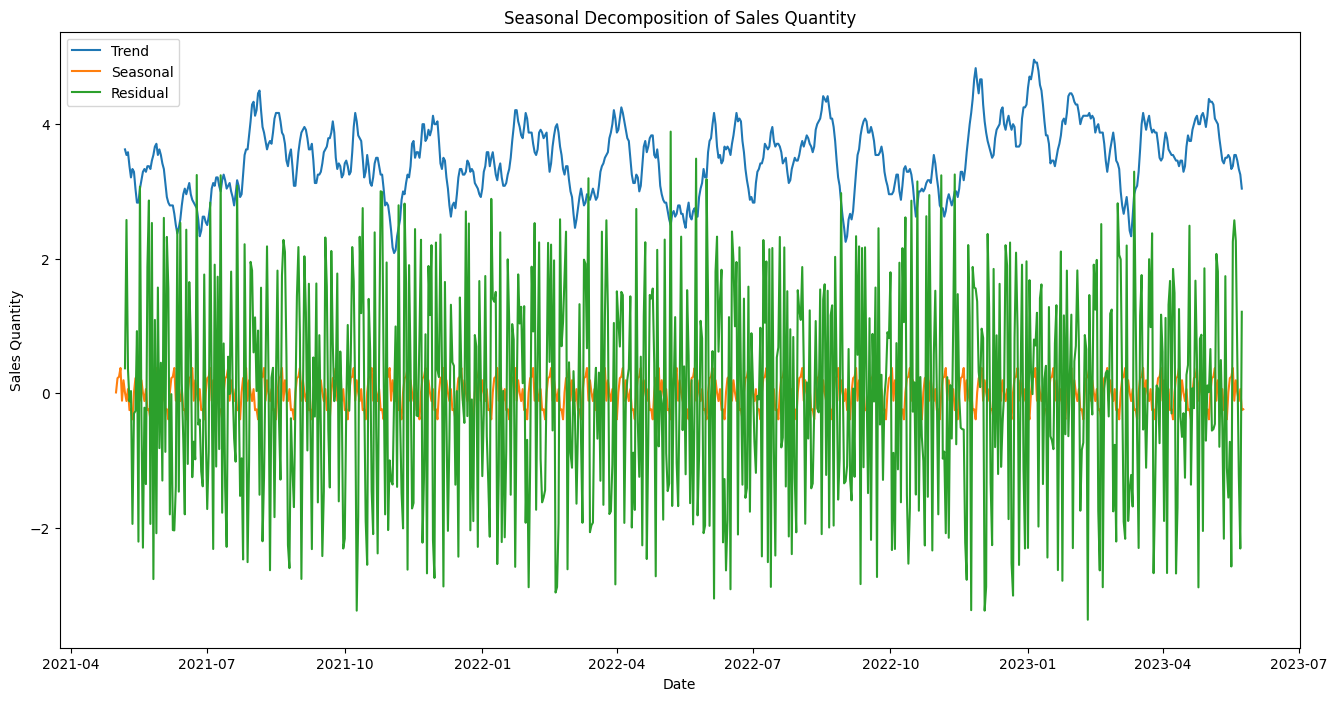

In [ ]:
# Seasonal Decomposition Plot
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['quantity'], model='additive', period=12)
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(data.index, decomposition.trend, label='Trend')
ax.plot(data.index, decomposition.seasonal, label='Seasonal')
ax.plot(data.index, decomposition.resid, label='Residual')
ax.set_xlabel('Date')
ax.set_ylabel('Sales Quantity')
ax.set_title('Seasonal Decomposition of Sales Quantity')
ax.legend()
plt.show()


# **Forecasting using ARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Training Root Mean Squared Error (RMSE): 9.963993207895326
Testing Root Mean Squared Error (RMSE): 14.255617920627644
Forecasted Sales:
2023-06: 99.62
2023-07: 105.00
2023-08: 103.58
2023-09: 103.96
2023-10: 103.86
2023-11: 103.88


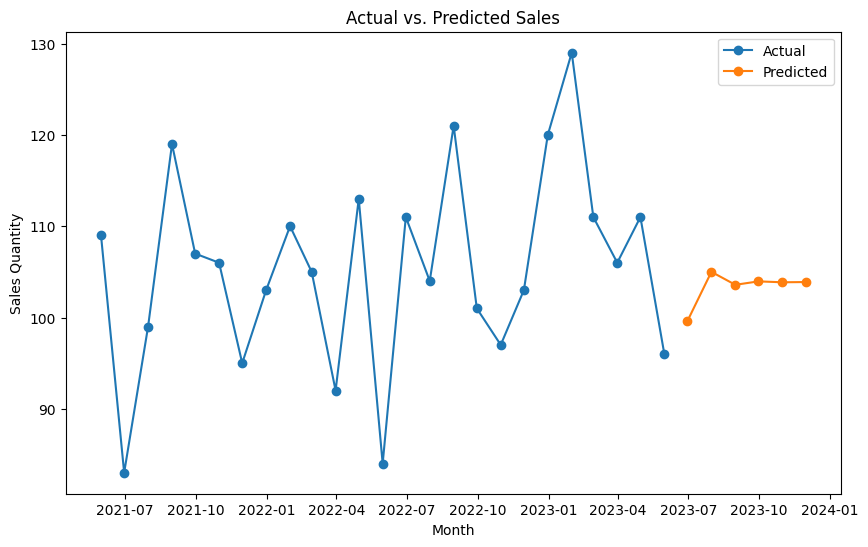

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Read the sales data from the file
sales_data = pd.read_csv('sales_data.csv', parse_dates=['date '], dayfirst=True)

# Set the 'date ' column as the index
sales_data.set_index('date ', inplace=True)

# Data Aggregation - Monthly Sales
monthly_sales = sales_data.resample('M').sum()

# Train-Test Split
train_size = int(len(monthly_sales) * 0.8)  # 80% for training
train_data, test_data = monthly_sales[:train_size], monthly_sales[train_size:]

# Choose a Time Series Forecasting Model (ARIMA)
model = ARIMA(train_data['quantity'], order=(1, 0, 0))  # (p, d, q) order
model_fit = model.fit()

# Model Training
model_fit = model.fit()

# Model Evaluation
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])
train_rmse = sqrt(mean_squared_error(train_data['quantity'], train_predictions))
print(f"Training Root Mean Squared Error (RMSE): {train_rmse}")

test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])
test_rmse = sqrt(mean_squared_error(test_data['quantity'], test_predictions))
print(f"Testing Root Mean Squared Error (RMSE): {test_rmse}")

# Generate Forecasts
forecast_horizon = 6  # Example: Forecasting for the next 6 months
forecast_dates = pd.date_range(start=test_data.index[-1], periods=forecast_horizon+1, freq='M')[1:]

# Use the trained model to generate forecasts
forecast = model_fit.forecast(steps=forecast_horizon)

# Print Forecasts
print("Forecasted Sales:")
for date, value in zip(forecast_dates, forecast):
    print(f"{date.strftime('%Y-%m')}: {value:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['quantity'], label='Actual', marker='o')
plt.plot(forecast_dates, forecast, label='Predicted', marker='o')
plt.xlabel('Month')
plt.ylabel('Sales Quantity')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()


# **Forecasting using SARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Training Root Mean Squared Error (RMSE): 29.030435131171853
Testing Root Mean Squared Error (RMSE): 12.077141593346822
Forecasted Sales:
2023-06: 118.16
2023-07: 117.56
2023-08: 117.79
2023-09: 114.54
2023-10: 116.43
2023-11: 112.58


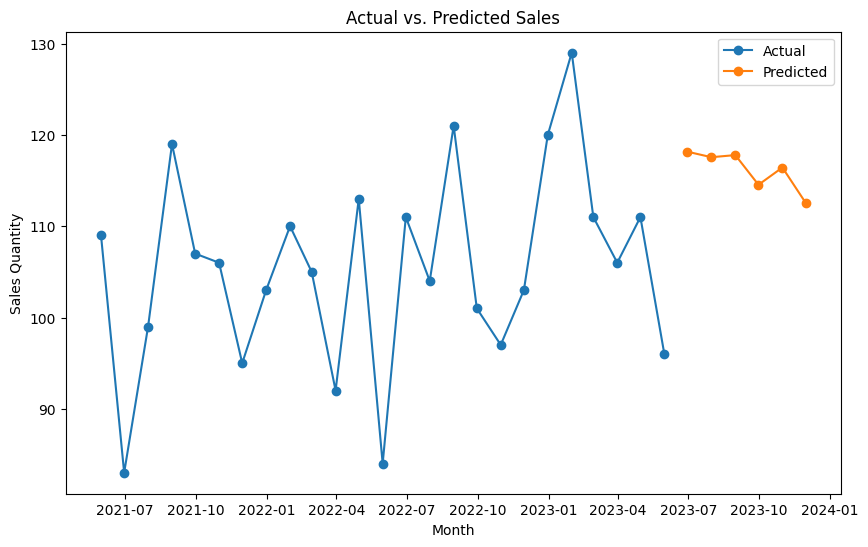

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Read the sales data from the file
sales_data = pd.read_csv('sales_data.csv', parse_dates=['date '], dayfirst=True)

# Set the 'date ' column as the index
sales_data.set_index('date ', inplace=True)

# Data Aggregation - Monthly Sales
monthly_sales = sales_data.resample('M').sum()

# Train-Test Split
train_size = int(len(monthly_sales) * 0.8)  # 80% for training
train_data, test_data = monthly_sales[:train_size], monthly_sales[train_size:]

# Choose a Time Series Forecasting Model (SARIMA)
model = SARIMAX(train_data['quantity'], order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))  # (p, d, q), (P, D, Q, S) order
model_fit = model.fit()

# Model Training
model_fit = model.fit()

# Model Evaluation
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])
train_rmse = sqrt(mean_squared_error(train_data['quantity'], train_predictions))
print(f"Training Root Mean Squared Error (RMSE): {train_rmse}")

test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])
test_rmse = sqrt(mean_squared_error(test_data['quantity'], test_predictions))
print(f"Testing Root Mean Squared Error (RMSE): {test_rmse}")

# Generate Forecasts
forecast_horizon = 6  # Example: Forecasting for the next 6 months
forecast_dates = pd.date_range(start=test_data.index[-1], periods=forecast_horizon+1, freq='M')[1:]

# Use the trained model to generate forecasts
forecast = model_fit.forecast(steps=forecast_horizon)

# Print Forecasts
print("Forecasted Sales:")
for date, value in zip(forecast_dates, forecast):
    print(f"{date.strftime('%Y-%m')}: {value:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['quantity'], label='Actual', marker='o')
plt.plot(forecast_dates, forecast, label='Predicted', marker='o')
plt.xlabel('Month')
plt.ylabel('Sales Quantity')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()


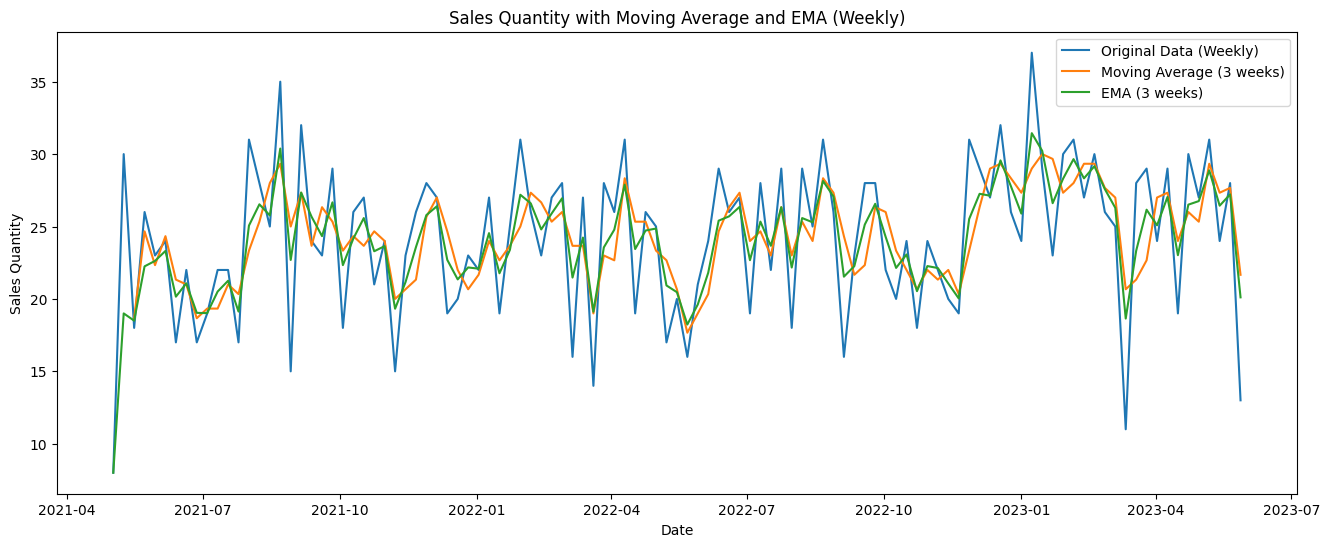

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the sales data from the file
data = pd.read_csv('sales_data.csv', parse_dates=['date '], dayfirst=True)

# Set the 'date ' column as the index
data.set_index('date ', inplace=True)

# Resample the data to weekly frequency
weekly_data = data['quantity'].resample('W').sum()

# Calculate the moving average on the weekly data
window = 3  # Window size for moving average
moving_avg = weekly_data.rolling(window=window).mean()

# Calculate the exponential moving average on the weekly data
ema_span = 3  # Span for exponential moving average
ema = weekly_data.ewm(span=ema_span, adjust=False).mean()

# Plot the original data, moving average, and exponential moving average
plt.figure(figsize=(16, 6))
plt.plot(weekly_data.index, weekly_data, label='Original Data (Weekly)')
plt.plot(weekly_data.index, moving_avg, label=f'Moving Average ({window} weeks)')
plt.plot(weekly_data.index, ema, label=f'EMA ({ema_span} weeks)')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('Sales Quantity with Moving Average and EMA (Weekly)')
plt.legend()
plt.show()


# **Forecasting using MOVING AVERAGES**

<ipython-input-56-4c80bfcb1103>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  forecast_moving_avg = pd.Series(index=forecast_dates, name='Moving Average Predictions')
<ipython-input-56-4c80bfcb1103>:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  forecast_ema = pd.Series(index=forecast_dates, name='EMA Predictions')
<ipython-input-56-4c80bfcb1103>:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weekly_data = weekly_data.append(pd.Series(index=[forecast_dates[i]], name='quantity', data=forecast_moving_avg.iloc[i]))
<ipython-input-56-4c80bfcb1103>:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use p

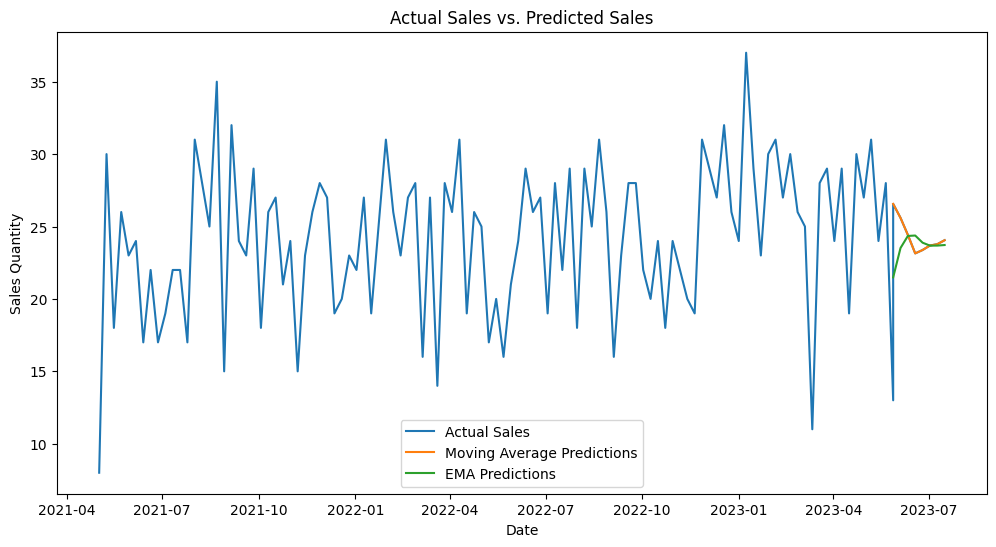

Forecasted Sales:
2023-05-28: 26.56
2023-06-04: 25.60
2023-06-11: 24.42
2023-06-18: 23.14
2023-06-25: 23.38
2023-07-02: 23.69
2023-07-09: 23.78
2023-07-16: 24.05


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the sales data from the file
data = pd.read_csv('sales_data.csv', parse_dates=['date '], dayfirst=True)

# Set the 'date ' column as the index
data.set_index('date ', inplace=True)

# Resample the data to weekly frequency
weekly_data = data['quantity'].resample('W').sum()

# Calculate the moving average on the weekly data
window = 4  # Window size for moving average
moving_avg = weekly_data.rolling(window=window).mean()

# Calculate the exponential moving average on the weekly data
ema_span = 4  # Span for exponential moving average
ema = weekly_data.ewm(span=ema_span, adjust=False).mean()

# Forecast future sales using the moving average
forecast_size = 8  # Number of weeks to forecast (8 weeks)
last_date = weekly_data.index[-1]

forecast_dates = pd.date_range(start=last_date, periods=forecast_size, freq='W')
forecast_moving_avg = pd.Series(index=forecast_dates, name='Moving Average Predictions')
forecast_ema = pd.Series(index=forecast_dates, name='EMA Predictions')

for i in range(forecast_size):
    forecast_moving_avg.iloc[i] = moving_avg[-window:].mean()
    forecast_ema.iloc[i] = ema[-1]

    # Update the data for the next iteration
    weekly_data = weekly_data.append(pd.Series(index=[forecast_dates[i]], name='quantity', data=forecast_moving_avg.iloc[i]))
    moving_avg = weekly_data.rolling(window=window).mean()
    ema = weekly_data.ewm(span=ema_span, adjust=False).mean()

# Plot the actual and predicted sales
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data, label='Actual Sales')
plt.plot(forecast_moving_avg.index, forecast_moving_avg, label='Moving Average Predictions')
plt.plot(forecast_ema.index, forecast_ema, label='EMA Predictions')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('Actual Sales vs. Predicted Sales')
plt.legend()
plt.show()

# Print the forecasted sales
print('Forecasted Sales:')
for date, value in forecast_moving_avg.items():
    print(f'{date.strftime("%Y-%m-%d")}: {value:.2f}')
